In [2]:
import pandas  as pd

In [4]:

pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
pd.set_option('max_colwidth',40)

In [6]:
train=pd.read_csv(r"/kaggle/input/movie-review-sentiment-analysis-kernels-only/train.tsv.zip",delimiter='\t')
test=pd.read_csv(r"/kaggle/input/movie-review-sentiment-analysis-kernels-only/test.tsv.zip",delimiter='\t')

In [7]:
train.head(100)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating ...,1
1,2,1,A series of escapades demonstrating ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage th...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is...,2


In [8]:
train['Phrase'].isnull().sum()

0

In [9]:
train['Sentiment'].isnull().sum()


0

In [10]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostl...
1,156062,8545,An intermittently pleasing but mostl...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly r...
4,156065,8545,intermittently pleasing but mostly r...


0 - negative   
1 - somewhat negative   
2 - neutral   
3 - somewhat positive   
4 - positive   

*We can see here that each sentence is broken into multiple phrases, each having their own sentiment classification. Each sentence is denoted by the 'SentenceId' column.*

In [11]:
# check the total no unique sentenceid 
train['SentenceId'].nunique() 

8529

In [12]:
test['SentenceId'].nunique() 

3310

In [13]:
train.shape

(156060, 4)

In [14]:
test.shape

(66292, 3)

In [15]:
## Returning average count of phrases per sentence, per Dataset
pd.DataFrame(train.groupby('SentenceId')['Phrase'].count()).head()

,Phrase
SentenceId,
1,63
2,18
3,35
4,40
5,10


In [16]:
train.groupby('SentenceId')['Phrase'].count().mean()

18.297572986282095

In [17]:
pd.DataFrame(test.groupby('SentenceId')['Phrase'].count()).head()

,Phrase
SentenceId,
8545,15
8546,78
8547,24
8548,41
8549,31


In [18]:
test.groupby('SentenceId')['Phrase'].count().mean()

20.027794561933536

### **Returning average word length of phrases**

In [19]:
import numpy as np


In [20]:
int(np.mean(train['Phrase'].apply(lambda x: len(x.split()))))

7

In [21]:
int(np.mean(test['Phrase'].apply(lambda x:len(x.split()))))

6

**Exploring Target Value**

In [22]:
train_labels=train['Sentiment'].value_counts().index #gets the unique value count of an object

In [23]:
train_count=train['Sentiment'].value_counts()

In [24]:
train_labels

Int64Index([2, 3, 1, 4, 0], dtype='int64')

Text(0, 0.5, 'count')

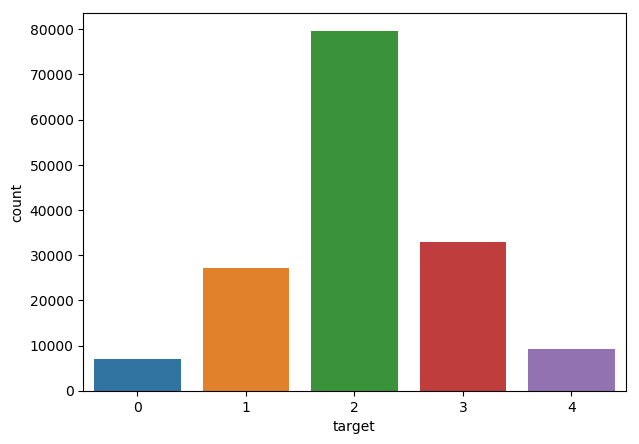

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 1, dpi = 100, figsize = (7, 5))
g=sns.barplot(train_labels,train_count)
ax.set_xlabel("target")
ax.set_ylabel("count")

# **Text Preprocessing**

In [26]:
#lets combine test data and train data to make text preprocessed


In [27]:
# but before that


In [28]:
test['Sentiment']=-999

In [29]:
test.head()



,PhraseId,SentenceId,Phrase,Sentiment
0,156061,8545,An intermittently pleasing but mostl...,-999
1,156062,8545,An intermittently pleasing but mostl...,-999
2,156063,8545,An,-999
3,156064,8545,intermittently pleasing but mostly r...,-999
4,156065,8545,intermittently pleasing but mostly r...,-999


we have added Sentiment column in test data with -999

In [30]:
# Concatenating Datasets before the cleaning can begin
data = pd.concat([train,test], ignore_index = True)

In [31]:

print(data.shape)
data.tail()

(222352, 4)


,PhraseId,SentenceId,Phrase,Sentiment
222347,222348,11855,"A long-winded , predictable scenario .",-999
222348,222349,11855,"A long-winded , predictable scenario",-999
222349,222350,11855,"A long-winded ,",-999
222350,222351,11855,A long-winded,-999
222351,222352,11855,predictable scenario,-999


In [32]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating ...,1
1,2,1,A series of escapades demonstrating ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [33]:
data.shape

(222352, 4)

**Noise Removal**

In [34]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
lemma=WordNetLemmatizer()

In [37]:
def clean_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
       
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [38]:
data['clean_review']=clean_review(data.Phrase.values)
data.head()       


,PhraseId,SentenceId,Phrase,Sentiment,clean_review
0,1,1,A series of escapades demonstrating ...,1,a series of escapade demonstrating t...
1,2,1,A series of escapades demonstrating ...,2,a series of escapade demonstrating t...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


**Seperating Train and Test Dataset**

In [39]:
df_train=data[data.Sentiment!=-999]


In [40]:
df_train.shape

(156060, 5)

In [41]:
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_review
0,1,1,A series of escapades demonstrating ...,1,a series of escapade demonstrating t...
1,2,1,A series of escapades demonstrating ...,2,a series of escapade demonstrating t...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [42]:
df_test=data[data.Sentiment==-999]
df_test.drop('Sentiment',axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:

print(df_test.shape)
df_test.head()

(66292, 4)


,PhraseId,SentenceId,Phrase,clean_review
156060,156061,8545,An intermittently pleasing but mostl...,an intermittently pleasing but mostl...
156061,156062,8545,An intermittently pleasing but mostl...,an intermittently pleasing but mostl...
156062,156063,8545,An,an
156063,156064,8545,intermittently pleasing but mostly r...,intermittently pleasing but mostly r...
156064,156065,8545,intermittently pleasing but mostly r...,intermittently pleasing but mostly r...


# **TF-IDF**

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1,2),max_df=0.95,min_df=10,sublinear_tf=True)

In [45]:
c2_train=tfidf.fit_transform(df_train.clean_review).toarray()
print(c2_train.shape)


(156060, 35192)


In [46]:
c2_test=tfidf.transform(df_test.clean_review).toarray()
print(c2_test.shape)

(66292, 35192)


In [47]:
y=df_train.Sentiment.values

In [48]:
y 

array([1, 2, 2, ..., 3, 2, 2])

# *Logistic Regression*

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [50]:
lr.fit(c2_train,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred=lr.predict(c2_test)

In [56]:
sub = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/sampleSubmission.csv', sep=',')

In [57]:
sub.Sentiment=y_pred


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,3
3,156064,2
4,156065,2


In [ ]:
sub.head(100)

In [58]:
sub.to_csv('submission.csv',index=False)